In [156]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

In [157]:
# os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\with_Offset')
os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Raw_dataset')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
# df.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
df

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y,x1,y1,x2,y2,x3,y3
0,11.949,0.145,-59.0,5.998,0.150,-57,9.045,0.372,-63,1,1,7,9,7,0,0,9
1,11.462,0.407,-55.0,6.028,0.267,-56,9.006,0.425,-63,1,1,7,9,7,0,0,9
2,11.246,0.245,-61.0,6.311,0.630,-55,9.241,0.414,-63,1,1,7,9,7,0,0,9
3,10.309,0.864,-69.0,5.686,0.210,-56,9.748,1.739,-62,1,1,7,9,7,0,0,9
4,12.125,0.252,-64.0,6.077,0.105,-57,8.967,0.513,-65,1,1,7,9,7,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1.227,0.181,-53.0,9.866,0.321,-69,5.647,1.047,-64,6,8,7,9,7,0,0,9
660,1.285,0.136,-53.0,10.022,0.226,-69,5.618,1.098,-64,6,8,7,9,7,0,0,9
661,1.188,0.150,-53.0,10.100,0.234,-68,5.676,1.021,-64,6,8,7,9,7,0,0,9
662,1.139,0.206,-53.0,10.139,0.158,-69,5.735,1.027,-64,6,8,7,9,7,0,0,9


In [158]:
df.drop(['AP1RSS','AP2RSS','AP3RSS','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)

In [159]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
#grouped = df.groupby(['x', 'y']).agg(['min'])

# Add the mean or average value of each column to the grouped dataframe
grouped = df.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
df = grouped.reset_index()
df

,x,y,A_P_1_R_T_T,A_P_1_S_T_D_E_V,A_P_2_R_T_T,A_P_2_S_T_D_E_V,A_P_3_R_T_T,A_P_3_S_T_D_E_V
0,1,1,10.178918,1.066333,5.965107,0.141504,9.408819,0.133744
1,1,2,10.418660,0.407708,7.160464,0.486028,9.887784,0.460747
2,1,3,9.312207,0.322244,9.164037,0.787931,7.157308,0.404662
3,1,7,5.741123,0.888978,9.734936,0.873201,1.912884,0.148901
4,1,8,7.183425,0.473028,11.232511,0.330619,0.476505,0.981901
5,2,1,11.408504,0.714262,5.881772,1.246364,8.554079,0.609167
6,2,2,9.316401,0.822399,5.554277,0.216622,9.118129,0.924308
7,2,3,9.202826,0.650289,5.802463,1.513773,7.514950,1.536497
8,2,7,6.341018,0.627516,7.910018,0.727868,2.725399,0.202878
9,2,8,8.434157,0.458550,9.463184,0.145792,1.790935,1.399032


In [160]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
df.rename(columns=new_name,inplace=True)
df


,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.178918,1.066333,5.965107,0.141504,9.408819,0.133744
1,1,2,10.418660,0.407708,7.160464,0.486028,9.887784,0.460747
2,1,3,9.312207,0.322244,9.164037,0.787931,7.157308,0.404662
3,1,7,5.741123,0.888978,9.734936,0.873201,1.912884,0.148901
4,1,8,7.183425,0.473028,11.232511,0.330619,0.476505,0.981901
5,2,1,11.408504,0.714262,5.881772,1.246364,8.554079,0.609167
6,2,2,9.316401,0.822399,5.554277,0.216622,9.118129,0.924308
7,2,3,9.202826,0.650289,5.802463,1.513773,7.514950,1.536497
8,2,7,6.341018,0.627516,7.910018,0.727868,2.725399,0.202878
9,2,8,8.434157,0.458550,9.463184,0.145792,1.790935,1.399032


In [161]:
input_data=df.iloc[:,2:] 
output_data = df.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [162]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 6)


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [164]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 50}
Mean Squared Error in meter: 2.353
Root Mean Squared Error (RMSE) on new data in meter: 1.534
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.571
R2 score is in percent: 38.83


In [166]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse)) 

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.84
Root Mean Squared Error (RMSE) on new data in m: 1.36
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 31.576
R2 score is in percent: 49.06


In [167]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(6,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu','sigmoid','tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [168]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='test_raw',
    project_name='RTT_Data_raw')

INFO:tensorflow:Reloading Tuner from test_raw\RTT_Data_raw\tuner0.json


In [169]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [170]:
tuner.results_summary()

Results summary
Results in test_raw\RTT_Data_raw
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 208
dropout_1: 0.2
num_hidden_layers: 1
units_2: 384
activation_2: sigmoid
dropout_2: 0.4
learning_rate: 0.01
units_3: 432
activation_3: sigmoid
dropout_3: 0.2
units_4: 208
activation_4: sigmoid
dropout_4: 0.0
units_5: 96
activation_5: relu
dropout_5: 0.30000000000000004
units_6: 400
activation_6: relu
dropout_6: 0.4
units_7: 304
activation_7: tanh
dropout_7: 0.30000000000000004
units_8: 464
activation_8: sigmoid
dropout_8: 0.2
units_9: 368
activation_9: tanh
dropout_9: 0.1
Score: 1.479874849319458
Trial summary
Hyperparameters:
units_1: 256
dropout_1: 0.2
num_hidden_layers: 1
units_2: 224
activation_2: tanh
dropout_2: 0.0
learning_rate: 0.01
units_3: 320
activation_3: tanh
dropout_3: 0.1
units_4: 144
activation_4: sigmoid
dropout_4: 0.2
units_5: 352
activation_5: sigmoid
dropout_5: 0.1
units_6: 352
activation_6: tanh
dropout_6: 0.2
units_7: 496
activation_7: sigmoid
dropout_

In [171]:
best_hps=tuner.get_best_hyperparameters()[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 0s 427ms/step - loss: 17.6891 - mse: 17.6891 - val_loss: 6.9277 - val_mse: 6.9277
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 5.1511 - mse: 5.1511 - val_loss: 3.9456 - val_mse: 3.9456
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 6.0851 - mse: 6.0851 - val_loss: 4.2722 - val_mse: 4.2722
Epoch 4/500
1/1 [==============================] - 0s 21ms/step - loss: 7.5308 - mse: 7.5308 - val_loss: 2.8387 - val_mse: 2.8387
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 6.4033 - mse: 6.4033 - val_loss: 1.3626 - val_mse: 1.3626
Epoch 6/500
1/1 [==============================] - 0s 18ms/step - loss: 3.2492 - mse: 3.2492 - val_loss: 1.3193 - val_mse: 1.3193
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 1.7613 - mse: 1.7613 - val_loss: 2.4554 - val_mse: 2.4554
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 1.8923 - mse: 1

In [172]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 1.9391 - mse: 1.9391


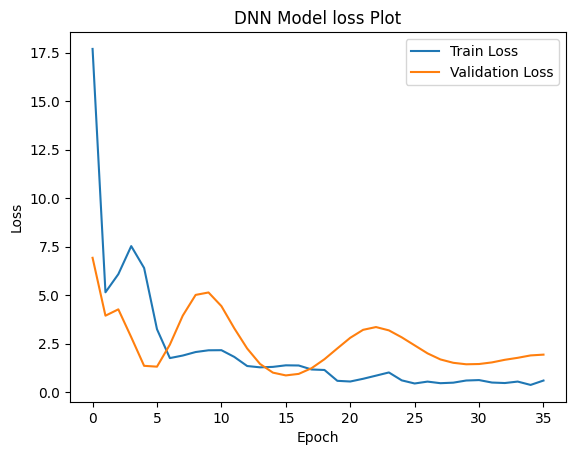

In [173]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [174]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 39ms/step


array([[5.912097  , 2.3855948 ],
       [4.850131  , 4.8783092 ],
       [1.7434348 , 7.484435  ],
       [1.4681333 , 2.0446372 ],
       [5.11489   , 6.57655   ],
       [5.9524016 , 3.516661  ],
       [2.4076872 , 0.6905172 ],
       [5.91811   , 4.022814  ],
       [5.7004857 , 0.7214453 ],
       [2.9093316 , 4.2698255 ],
       [0.32912236, 4.3718686 ],
       [1.7019418 , 4.947535  ]], dtype=float32)

In [175]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 1.94
Root Mean Squared Error (RMSE) on new data in m: 1.39
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.33
R2 score is in percent: 49.05


In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 50}
Mean Squared Error in meter: 0.192
Root Mean Squared Error (RMSE) on new data in meter: 0.438
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.157
R2 score is in percent: 94.48


In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import pandas as pd

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, RF_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
r2 = r2_score(y_test, RF_pred) * 100

# Store the results in a dictionary
results = {'n_estimators': [], 'max_depth': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Loop over the different values of n_estimators and max_depth
for n in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        # Define the model with the current hyperparameters
        model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)

        # Fit the model to the training data
        model.fit(y_pred, y_test)

        # Get the predictions using the trained model
        RF_pred = model.predict(y_pred)

        # Calculate the evaluation metrics
        mse = mean_squared_error(y_test, RF_pred)
        rmse = sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
        r2 = r2_score(y_test, RF_pred) * 100

        # Store the results in the dictionary
        results['n_estimators'].append(n)
        results['max_depth'].append(depth)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['MAPE'].append(mape)
        results['R2'].append(r2)

# Print the results as a pandas dataframe
results_RF_df = pd.DataFrame(results)
print(results_RF_df)


Best Hyperparameters: {'max_depth': 4, 'n_estimators': 50}
    n_estimators  max_depth       MSE      RMSE       MAPE         R2
0             50          2  0.436827  0.660929  18.175260  87.381449
1             50          4  0.191695  0.437830  10.157316  94.479968
2             50          6  0.188017  0.433609   9.921230  94.596440
3             50          8  0.188017  0.433609   9.921230  94.596440
4            100          2  0.431303  0.656737  18.419404  87.502621
5            100          4  0.185823  0.431072  10.655808  94.775550
6            100          6  0.182912  0.427683  10.445437  94.864801
7            100          8  0.182912  0.427683  10.445437  94.864801
8            200          2  0.440528  0.663722  18.900941  87.169571
9            200          4  0.183308  0.428144  10.998435  94.713667
10           200          6  0.179970  0.424228  10.789980  94.812770
11           200          8  0.179970  0.424228  10.789980  94.812770


In [178]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.51
Root Mean Squared Error (RMSE) on new data in m: 0.71
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 19.80
R2 score is in percent: 85.53


In [179]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import pandas as pd

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics for the best K value
mse = mean_squared_error(y_test, knn_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
r2 = r2_score(y_test, knn_pred)

# Store the results in a dictionary
results = {'k': [grid_search.best_params_['n_neighbors']], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R2': [r2]}

# Loop over the different values of K
for k in param_grid['n_neighbors']:
    # Set the K parameter of the KNN model
    knn_model.set_params(n_neighbors=k)

    # Fit the KNN model to the training data
    knn_model.fit(y_pred, y_test)

    # Get the predictions using the trained KNN model
    knn_pred = knn_model.predict(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, knn_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
    r2 = r2_score(y_test, knn_pred)

    # Store the results in the dictionary
    results['k'].append(k)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAPE'].append(mape)
    results['R2'].append(r2)

# Print the results as a pandas dataframe
results_KNN_df = pd.DataFrame(results)
print(results_KNN_df)


Best K value found by grid search: 3
   k       MSE      RMSE       MAPE        R2
0  3  0.509259  0.713624  19.803241  0.855322
1  3  0.509259  0.713624  19.803241  0.855322
2  5  0.976667  0.988264  27.578373  0.725123
3  7  1.596088  1.263364  37.288124  0.543459
4  9  2.037551  1.427428  43.183973  0.415895


In [180]:
from tensorflow.keras.models import load_model

dnn_model.save('my_DNN_Regrr_model_xy_no_feature_extraction_without_offset.h5')


In [181]:
loaded_model = load_model('my_DNN_Regrr_model_xy_no_feature_extraction_without_offset.h5')
loaded_model

In [182]:
# dfff=pd.read_csv('D:/testt.csv')
#data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\With_offset'
data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\Raw_testdata'

os.chdir(data_folder)
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
# dfff.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
dfff

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y,x1,y1,x2,y2,x3,y3
0,9.664,1.209,-67.0,5.920,0.163,-55,9.368,0.140,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0
1,9.723,1.174,-66.0,5.920,0.162,-55,9.397,0.150,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0
2,9.576,1.205,-66.0,5.920,0.140,-55,9.456,0.125,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0
3,9.693,1.191,-67.0,5.881,0.126,-55,9.319,0.165,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0
4,9.811,1.128,-66.0,5.920,0.186,-55,9.426,0.145,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.285,0.661,-53.0,10.256,0.126,-68,5.969,0.907,-60,6,8,7.0,9.0,7.0,0.0,0.0,9.0
219,1.314,0.165,-54.0,10.256,0.141,-68,6.204,0.874,-59,6,8,7.0,9.0,7.0,0.0,0.0,9.0
220,1.383,0.136,-54.0,10.295,0.126,-68,6.409,0.577,-56,6,8,7.0,9.0,7.0,0.0,0.0,9.0
221,1.109,1.239,-52.0,10.373,0.065,-68,5.764,1.011,-58,6,8,7.0,9.0,7.0,0.0,0.0,9.0


In [183]:
dfff.drop(['AP1RSS','AP2RSS','AP3RSS','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)

In [184]:
# Add the mean or average value of each column to the grouped dataframe
grouped = dfff.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
dffff = grouped.reset_index()

In [185]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
dffff.rename(columns=new_name,inplace=True)
dffff

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,9.995851,1.125597,5.947130,0.159604,9.403380,0.123617
1,1,2,10.438876,0.394583,7.118710,0.445696,9.829392,0.493212
2,1,3,9.264814,0.273084,8.814989,1.123449,7.161158,0.400470
3,1,7,3.894320,1.715281,7.884090,1.308120,5.074954,0.636366
4,1,8,7.157109,0.534206,11.125667,0.375055,0.478882,0.980824
5,2,1,11.466279,0.809003,5.983782,0.990327,8.905374,0.883837
6,2,2,9.288792,0.752261,5.557330,0.211597,9.406587,0.919855
7,2,3,9.414815,0.524892,5.769318,1.316199,7.227747,1.820406
8,2,7,6.484015,0.611780,7.812446,0.707883,2.728191,0.206484
9,2,8,8.353455,0.480833,9.475557,0.141216,1.861306,1.372664


In [186]:
input_data=dffff.iloc[:,2:] 
output_data = dffff.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

# input_data=dfff.iloc[:,:6] 
# output_data = dfff.iloc[:, 6:]
# input_data=np.array(input_data.values)
# output_data=np.array(output_data.values)
print(input_data)
print(output_data)

[[ 9.99585065  1.1255974   5.94712987  0.1596039   9.40337987  0.12361688]
 [10.43887633  0.39458304  7.11871025  0.44569611  9.82939223  0.49321201]
 [ 9.26481404  0.27308421  8.81498947  1.12344912  7.16115789  0.40047018]
 [ 3.89432042  1.71528052  7.88409038  1.30811972  5.07495423  0.6363662 ]
 [ 7.15710909  0.53420606 11.12566667  0.37505455  0.47888182  0.98082424]
 [11.46627891  0.8090034   5.98378231  0.99032653  8.90537415  0.88383673]
 [ 9.28879208  0.75226073  5.55733003  0.21159736  9.40658746  0.91985479]
 [ 9.41481534  0.52489205  5.76931818  1.31619886  7.22774716  1.82040625]
 [ 6.48401466  0.61178006  7.81244575  0.7078827   2.72819062  0.20648387]
 [ 8.35345522  0.48083333  9.47555721  0.14121642  1.86130597  1.37266418]
 [ 9.14743168  0.46257453  5.69989441  1.92878882 10.93986335  1.73279503]
 [ 7.58123699  0.95426012  4.8369104   0.74130058  7.92254624  0.49110694]
 [ 6.95790501  1.40443799  5.00621108  2.03592348  9.49172032  0.2378628 ]
 [ 7.31536932  2.00688352

In [187]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(37, 2)
(37, 6)


In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX= sc.fit_transform(XX)

In [189]:
y_predd=loaded_model.predict(XX)
y_predd

2/2 [==============================] - 0s 2ms/step


array([[0.93518704, 0.7349813 ],
       [1.2624656 , 1.2802596 ],
       [0.9239081 , 2.4627185 ],
       [3.986934  , 6.9709506 ],
       [2.157557  , 8.198109  ],
       [2.0247543 , 0.9077969 ],
       [2.236458  , 1.4999514 ],
       [2.1505764 , 2.544671  ],
       [1.9567945 , 6.257013  ],
       [1.8851928 , 7.237517  ],
       [3.1924727 , 1.0789269 ],
       [2.6069489 , 1.6455309 ],
       [3.5034573 , 2.972396  ],
       [1.2347618 , 3.217177  ],
       [3.7941422 , 5.202245  ],
       [2.6853197 , 5.6357074 ],
       [2.7277    , 6.151461  ],
       [1.0113523 , 6.250135  ],
       [3.9844759 , 0.8284024 ],
       [3.5029094 , 1.6039629 ],
       [3.6022842 , 2.4196987 ],
       [4.2841988 , 3.4839067 ],
       [3.8672872 , 7.573714  ],
       [4.6855927 , 1.2493662 ],
       [5.444623  , 1.260031  ],
       [5.228656  , 3.9522433 ],
       [5.1908283 , 4.1406846 ],
       [5.2888007 , 6.1634307 ],
       [5.0160613 , 5.8318295 ],
       [4.4526396 , 7.131265  ],
       [6.

In [190]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.49
Root Mean Squared Error (RMSE) on new data in mm: 0.70
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 18.64
R2 score is in percent: 86.13


In [191]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(y_predd, columns=['predicted_x','predicted_y'])
df_finall_dnn = pd.DataFrame()
df_finall_dnn = pd.concat([y_predd, yy], axis=1)
df_finall_dnn

,predicted_x,predicted_y,x,y
0,0.935187,0.734981,1,1
1,1.262466,1.280260,1,2
2,0.923908,2.462718,1,3
3,3.986934,6.970951,1,7
4,2.157557,8.198109,1,8
5,2.024754,0.907797,2,1
6,2.236458,1.499951,2,2
7,2.150576,2.544671,2,3
8,1.956795,6.257013,2,7
9,1.885193,7.237517,2,8


In [192]:
XX=pd.DataFrame(XX,columns=['AP1','AP1STDV','AP2','AP2STDV','AP3','AP#STDV'])
df_finalll_dnn = pd.concat([y_predd, yy,XX], axis=1)
df_finalll_dnn

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,0.935187,0.734981,1,1,1.521791,0.488714,-0.060623,-0.972302,0.862395,-1.361107
1,1.262466,1.280260,1,2,1.720119,-0.925163,0.412991,-0.440219,1.018102,-0.626532
2,0.923908,2.462718,1,3,1.194531,-1.160157,1.098716,0.820286,0.042867,-0.810858
3,3.986934,6.970951,1,7,-1.209655,1.629238,0.722398,1.163742,-0.719636,-0.342012
4,2.157557,8.198109,1,8,0.250984,-0.655114,2.032813,-0.571600,-2.399491,0.342603
5,2.024754,0.907797,2,1,2.180052,-0.123620,-0.045806,0.572701,0.680375,0.149839
6,2.236458,1.499951,2,2,1.205265,-0.233368,-0.218201,-0.875603,0.863567,0.221425
7,2.150576,2.544671,2,3,1.261682,-0.673128,-0.132504,1.178768,0.067206,2.011281
8,1.956795,6.257013,2,7,-0.050337,-0.505076,0.693436,0.047403,-1.577373,-1.196408
9,1.885193,7.237517,2,8,0.786547,-0.758344,1.365752,-1.006500,-1.894218,1.121389


In [193]:
# df_finall_dnn.to_csv('output_data_dnn_no_offset.csv', index=False)

In [194]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from math import sqrt
# from sklearn.metrics import r2_score

# # Define the model
# model = RandomForestRegressor(random_state=42)

# # Define the hyperparameters to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 4, 6, 8]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(y_predd,yy)
# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Predict on new data with the best model
# best_model = grid_search.best_estimator_
# RF_pred = best_model.predict(y_predd)

# # Calculate the mean squared error
# mse = mean_squared_error(yy, RF_pred)
# print("Mean Squared Error in meter: {:.3f}" .format(mse))

# rmse=sqrt(mean_squared_error(yy, RF_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

In [195]:
best_model.fit(y_predd,yy)
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Mean Squared Error in meter: 0.162
Root Mean Squared Error (RMSE) on new data in meter: 0.403
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 14.74
R2 score is in percent: 95.38


In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Define the model with hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# Train the model on the training data
model.fit(y_predd,yy)

# Use the model to predict on the test data
RF_pred = model.predict(y_predd)


# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}".format(mse))

rmse = sqrt(mean_squared_error(yy, RF_pred))
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy, RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))


Mean Squared Error in meter: 0.099
Root Mean Squared Error (RMSE) on new data in meter: 0.315
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.72
R2 score is in percent: 97.13


In [197]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.230000,1.300000,1,1
1,1.470000,1.830000,1,2
2,1.543333,3.050000,1,3
3,2.220000,7.230000,1,7
4,1.585000,7.856333,1,8
5,1.990000,1.275000,2,1
6,2.215000,1.935000,2,2
7,2.140833,2.970000,2,3
8,2.169667,7.311833,2,7
9,1.996333,7.826833,2,8


In [198]:
#df_finall.to_csv('output_data_no_offset.csv', index=False)

In [199]:
best_knn_model.fit(y_predd, yy)
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.20
Root Mean Squared Error (RMSE) on new data in m: 0.44
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 15.78
R2 score is in percent: 94.72


In [200]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for the grid search
# param_grid = {'n_neighbors': [3,5,7,9]}

# # Create a KNN model
# knn_model = KNeighborsRegressor()

# # Perform a grid search using cross-validation
# grid_search = GridSearchCV(knn_model, param_grid, cv=5)
# grid_search.fit(y_predd, yy)

# # Print the best parameter value found by the grid search
# print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# # Get the predictions using the best K value
# best_knn_model = grid_search.best_estimator_
# knn_pred = best_knn_model.predict(y_predd)

# # Calculate the evaluation metrics
# mse = mean_squared_error(yy, knn_pred)
# print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
# rmse=sqrt(mean_squared_error(yy, knn_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

In [201]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(knn_pred, columns=['predicted_x','predicted_y'])
df_finall_KNN = pd.DataFrame()
df_finall_KNN = pd.concat([y_predd, yy], axis=1)
df_finall_KNN

,predicted_x,predicted_y,x,y
0,1.333333,1.333333,1,1
1,1.333333,1.666667,1,2
2,2.000000,3.333333,1,3
3,2.000000,7.000000,1,7
4,1.666667,7.666667,1,8
5,1.666667,1.333333,2,1
6,2.333333,1.666667,2,2
7,2.000000,3.333333,2,3
8,1.666667,7.333333,2,7
9,1.666667,7.666667,2,8


In [202]:
# df_finall_KNN.to_csv('output_data__KNN_no_offset.csv', index=False)

In [203]:
df_finalll_dnn.head()

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,0.935187,0.734981,1,1,1.521791,0.488714,-0.060623,-0.972302,0.862395,-1.361107
1,1.262466,1.280260,1,2,1.720119,-0.925163,0.412991,-0.440219,1.018102,-0.626532
2,0.923908,2.462718,1,3,1.194531,-1.160157,1.098716,0.820286,0.042867,-0.810858
3,3.986934,6.970951,1,7,-1.209655,1.629238,0.722398,1.163742,-0.719636,-0.342012
4,2.157557,8.198109,1,8,0.250984,-0.655114,2.032813,-0.571600,-2.399491,0.342603


In [204]:
df.head()

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.178918,1.066333,5.965107,0.141504,9.408819,0.133744
1,1,2,10.418660,0.407708,7.160464,0.486028,9.887784,0.460747
2,1,3,9.312207,0.322244,9.164037,0.787931,7.157308,0.404662
3,1,7,5.741123,0.888978,9.734936,0.873201,1.912884,0.148901
4,1,8,7.183425,0.473028,11.232511,0.330619,0.476505,0.981901


In [205]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.509259,0.713624,19.803241,0.855322
1,3,0.509259,0.713624,19.803241,0.855322
2,5,0.976667,0.988264,27.578373,0.725123
3,7,1.596088,1.263364,37.288124,0.543459
4,9,2.037551,1.427428,43.183973,0.415895


In [206]:
results_RF_df

,n_estimators,max_depth,MSE,RMSE,MAPE,R2
0,50,2,0.436827,0.660929,18.175260,87.381449
1,50,4,0.191695,0.437830,10.157316,94.479968
2,50,6,0.188017,0.433609,9.921230,94.596440
3,50,8,0.188017,0.433609,9.921230,94.596440
4,100,2,0.431303,0.656737,18.419404,87.502621
5,100,4,0.185823,0.431072,10.655808,94.775550
6,100,6,0.182912,0.427683,10.445437,94.864801
7,100,8,0.182912,0.427683,10.445437,94.864801
8,200,2,0.440528,0.663722,18.900941,87.169571
9,200,4,0.183308,0.428144,10.998435,94.713667


In [207]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.509259,0.713624,19.803241,0.855322
1,3,0.509259,0.713624,19.803241,0.855322
2,5,0.976667,0.988264,27.578373,0.725123
3,7,1.596088,1.263364,37.288124,0.543459
4,9,2.037551,1.427428,43.183973,0.415895


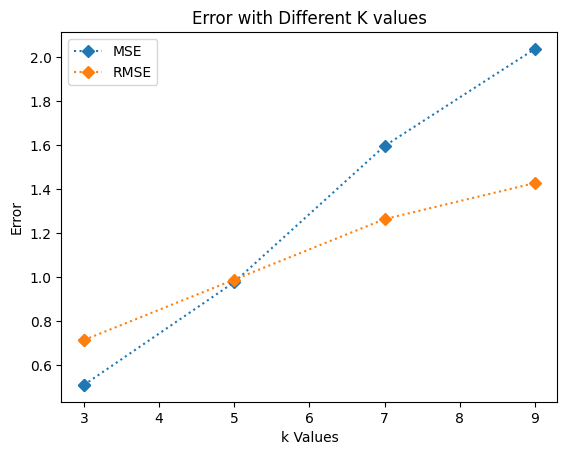

In [208]:
import matplotlib.pyplot as plt

# Select the columns to plot
df_plot = results_KNN_df[['k', 'MSE', 'RMSE']]

# Set the index to be the 'k' column
df_plot = df_plot.set_index('k')

# Plot the data
df_plot.plot(kind='line', linestyle='dotted', marker='D')

# Set the x-axis label
plt.xlabel('k Values')

# Set the y-axis label
plt.ylabel('Error')
plt.title('Error with Different K values')
# Show the plot
plt.show()


<Figure size 2000x1600 with 0 Axes>

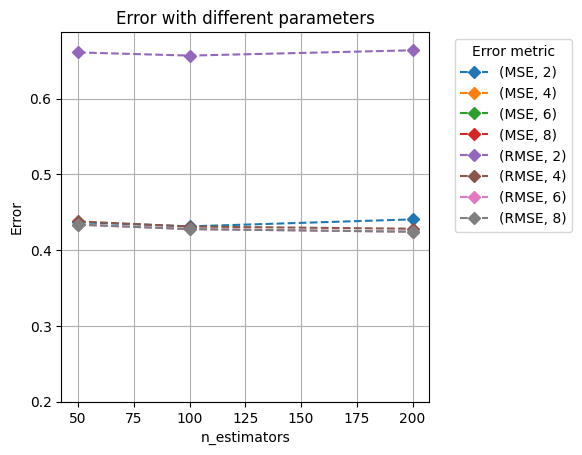

In [209]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 16))

# Select the columns to plot
df_plot = results_RF_df[['n_estimators', 'max_depth', 'MSE', 'RMSE']]

# Pivot the max_depth level to columns
df_plot = df_plot.set_index(['n_estimators','max_depth'])[['MSE', 'RMSE']].unstack() #unstack() method to reshape the dataframe so that it can be plotted more easily.  unstack() method to pivot the max_depth level to columns.

# Plot the data
df_plot.plot(kind='line', marker='D', linestyle='--')

# Set the x-axis label
plt.xlabel('n_estimators')

# Set the y-axis label
plt.ylabel('Error')
plt.grid()

# Set the legend title
legend = plt.legend(title='Error metric', loc='best', bbox_to_anchor=(1.05, 1))

# Set the legend outside of the plot
plt.subplots_adjust(right=0.7)
# Set the y-axis limits
plt.ylim(0.2)
plt.title('Error with different parameters')
# Show the plot
plt.show()


In [210]:
df_finall

,predicted_x,predicted_y,x,y
0,1.230000,1.300000,1,1
1,1.470000,1.830000,1,2
2,1.543333,3.050000,1,3
3,2.220000,7.230000,1,7
4,1.585000,7.856333,1,8
5,1.990000,1.275000,2,1
6,2.215000,1.935000,2,2
7,2.140833,2.970000,2,3
8,2.169667,7.311833,2,7
9,1.996333,7.826833,2,8


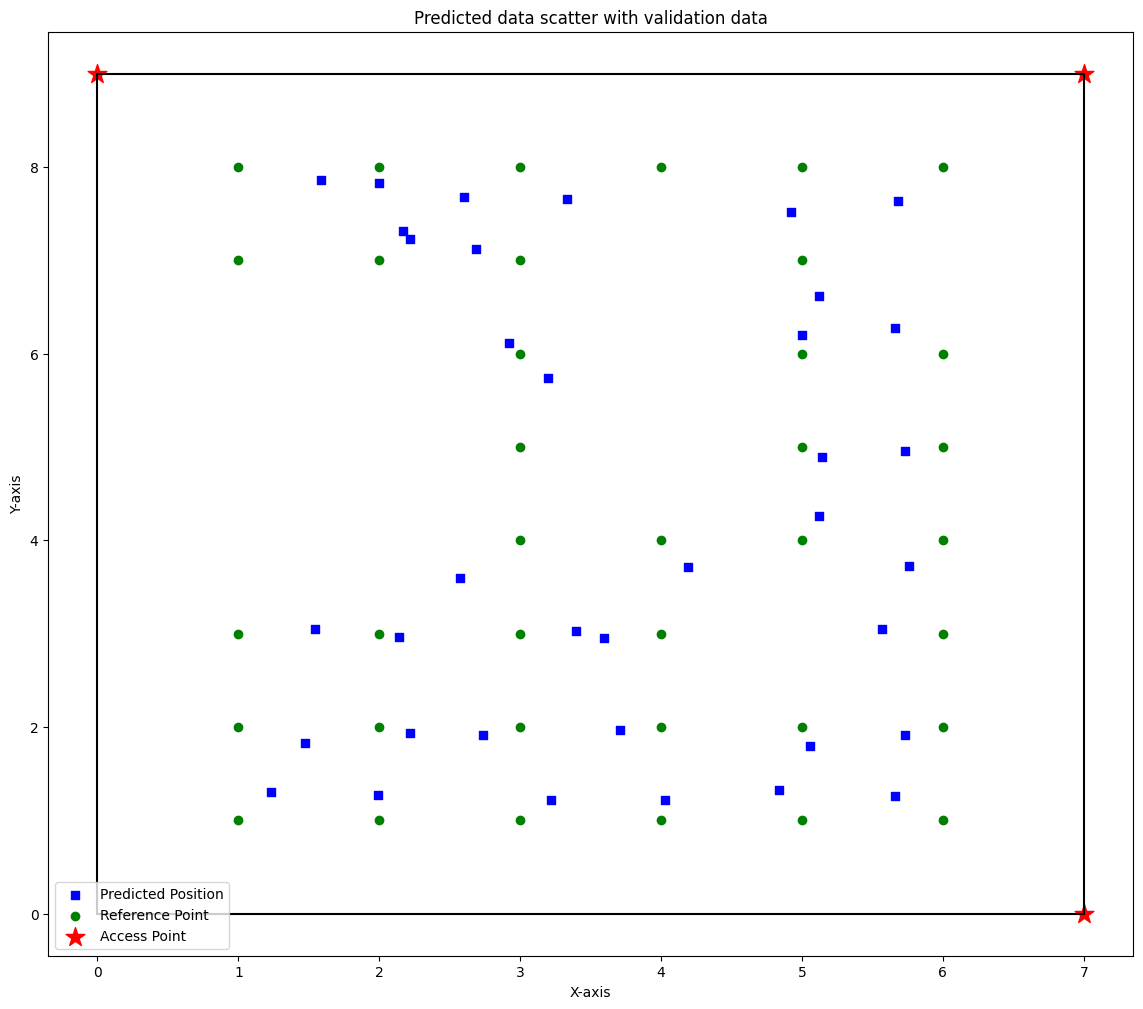

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

# Set up the room coordinates
x = [0, 7, 7, 0, 0]
y = [0, 0, 9, 9, 0]

# Plot the room as a polygon
plt.plot(x, y, color='black')

plt.scatter(df_finall['predicted_x'], df_finall['predicted_y'], color='blue', marker='s', label='Predicted Position')
plt.scatter(df_finall['x'], df_finall['y'], color='green', label='Reference Point')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Predicted data scatter with validation data')
plt.legend(loc='best')

# Highlight specific points with a red star symbol
plt.scatter(7, 0, marker='*', color='red', s=200, label='Access Point')
plt.scatter(0, 9, marker='*', color='red', s=200)
plt.scatter(7, 9, marker='*', color='red', s=200)

plt.legend(loc='lower left')

plt.show()


In [212]:
df_finall['errorx']=df_finall['predicted_x']-df_finall['x']

In [213]:
df_finall['errory']=df_finall['predicted_y']-df_finall['y']
df_finall

,predicted_x,predicted_y,x,y,errorx,errory
0,1.230000,1.300000,1,1,0.230000,0.300000
1,1.470000,1.830000,1,2,0.470000,-0.170000
2,1.543333,3.050000,1,3,0.543333,0.050000
3,2.220000,7.230000,1,7,1.220000,0.230000
4,1.585000,7.856333,1,8,0.585000,-0.143667
5,1.990000,1.275000,2,1,-0.010000,0.275000
6,2.215000,1.935000,2,2,0.215000,-0.065000
7,2.140833,2.970000,2,3,0.140833,-0.030000
8,2.169667,7.311833,2,7,0.169667,0.311833
9,1.996333,7.826833,2,8,-0.003667,-0.173167


In [214]:
df_finall['abs_error']= df_finall['errorx']+df_finall['errory']

In [215]:
df_finall

,predicted_x,predicted_y,x,y,errorx,errory,abs_error
0,1.230000,1.300000,1,1,0.230000,0.300000,0.530000
1,1.470000,1.830000,1,2,0.470000,-0.170000,0.300000
2,1.543333,3.050000,1,3,0.543333,0.050000,0.593333
3,2.220000,7.230000,1,7,1.220000,0.230000,1.450000
4,1.585000,7.856333,1,8,0.585000,-0.143667,0.441333
5,1.990000,1.275000,2,1,-0.010000,0.275000,0.265000
6,2.215000,1.935000,2,2,0.215000,-0.065000,0.150000
7,2.140833,2.970000,2,3,0.140833,-0.030000,0.110833
8,2.169667,7.311833,2,7,0.169667,0.311833,0.481500
9,1.996333,7.826833,2,8,-0.003667,-0.173167,-0.176833
